In [53]:
import pandas as pd
import seaborn as sns

In [76]:
data = pd.read_pickle("df_results_1_0")

In [77]:
data.reset_index(inplace=True)

In [78]:
data.drop([16,17, 18, 19], axis=0, inplace=True)
data.drop("index", axis=1, inplace=True)

In [79]:
data

,Classifier,Precision,Recall,F1-score,Timestamp
0,Support Vector Mashines,0.71,0.50,0.59,11052023_0018
1,Decision Tree,0.50,0.42,0.46,11052023_0018
2,Random Forest,0.83,0.62,0.71,11052023_0018
3,Neural Network,0.33,0.60,0.43,11052023_0018
4,Support Vector Mashines,0.62,0.32,0.43,11052023_0034
5,Decision Tree,0.37,0.55,0.44,11052023_0034
6,Random Forest,0.57,0.62,0.60,11052023_0034
7,Neural Network,0.41,0.60,0.48,11052023_0034
8,Support Vector Mashines,0.51,0.57,0.54,11052023_0047
9,Decision Tree,0.48,0.40,0.44,11052023_0047


In [80]:
data.groupby(by="Classifier").mean().round(2)

,Precision,Recall,F1-score
Classifier,,,
Decision Tree,0.44,0.46,0.43
Neural Network,0.40,0.54,0.45
Random Forest,0.82,0.64,0.72
Support Vector Mashines,0.62,0.45,0.52


In [81]:
data.describe()

,Precision,Recall,F1-score
count,40.000000,40.00000,40.000000
mean,0.570750,0.52375,0.530250
std,0.191705,0.11167,0.126217
min,0.290000,0.28000,0.320000
25%,0.407500,0.47250,0.437500
50%,0.530000,0.51000,0.495000
75%,0.702500,0.62000,0.592500
max,0.970000,0.75000,0.810000


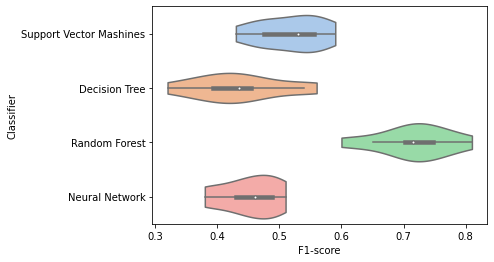

In [82]:
ax = sns.violinplot(data=data, y="Classifier", x="F1-score", orient="h", palette="pastel", showmeans=True, cut=0)

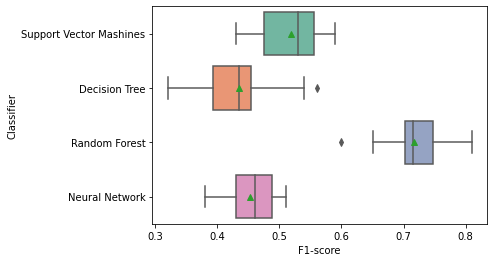

In [83]:
ax = sns.boxplot(data=data, y="Classifier", x="F1-score", orient="h", palette="Set2", showmeans=True)
# sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", color="white", showmeans=True, ax=ax)

<AxesSubplot:xlabel='Recall', ylabel='Classifier'>

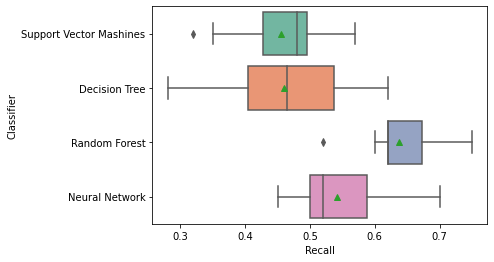

In [84]:
sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", palette="Set2", showmeans=True)

<AxesSubplot:xlabel='Precision', ylabel='Classifier'>

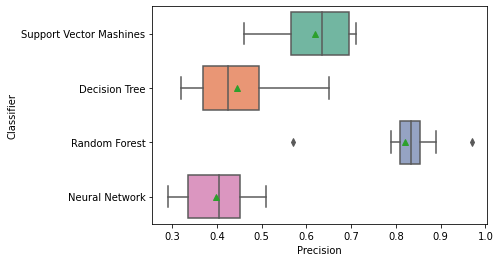

In [85]:
sns.boxplot(data=data, y="Classifier", x="Precision", orient="h", palette="Set2", showmeans=True)

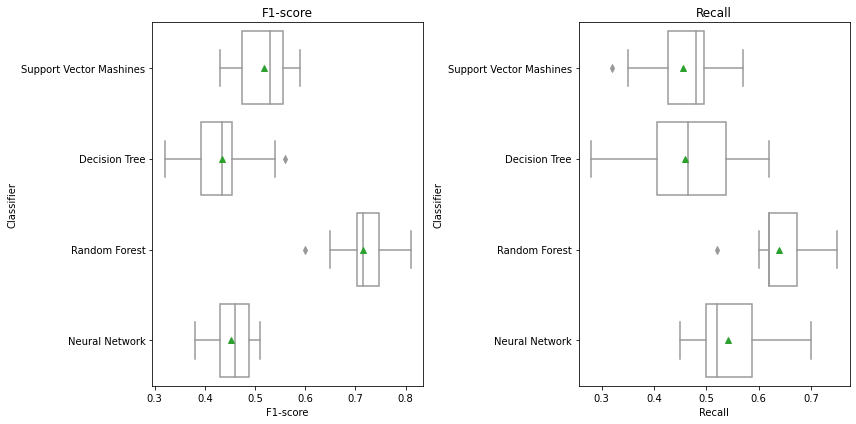

In [86]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

ax1 = sns.boxplot(data=data, y="Classifier", x="F1-score", orient="h", color="white", showmeans=True, ax=axs[0])
ax1.set_title("F1-score")

ax2 = sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", color="white", showmeans=True, ax=axs[1])
ax2.set_title("Recall")

plt.tight_layout()
plt.show()

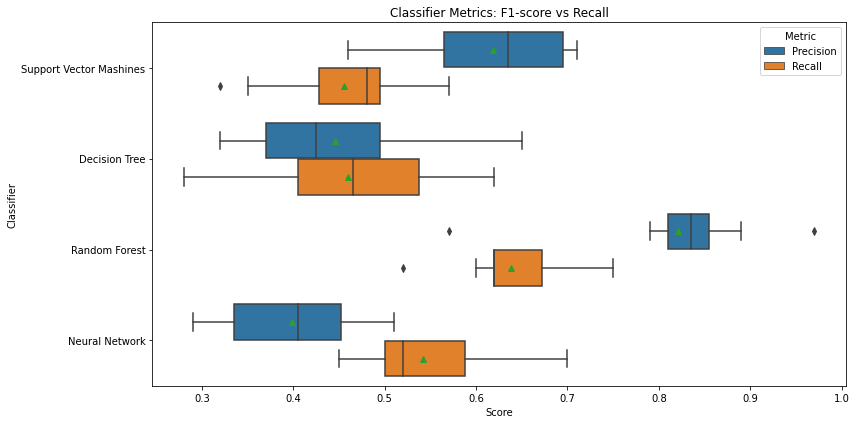

In [87]:
# Reshape the data
data_melted = pd.melt(data, id_vars='Classifier', value_vars=['Precision', 'Recall'], var_name='Metric', value_name='Score')

# Create the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=data_melted, y="Classifier", x="Score", orient="h", hue="Metric", showmeans=True)
ax.set_title("Classifier Metrics: F1-score vs Recall")
plt.tight_layout()
plt.show()